In [1]:
import requests
import pandas as pd
import sqlite3
import json
import sqlalchemy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import SGDRegressor

In [85]:
#payload = {'$limit':25}
r = requests.get('https://data.cityofnewyork.us/resource/vmmu-wj3w.json')

In [86]:
r.json()

[{'dbn': '01M015',
  'school_name': 'P.S. 015 Roberto Clemente',
  'year': '2016-17',
  'total_enrollment': '178',
  'grade_3k_pk_half_day_full': '17',
  'grade_k': '28',
  'grade_1': '33',
  'grade_2': '27',
  'grade_3': '31',
  'grade_4': '24',
  'grade_5': '18',
  'grade_6': '0',
  'grade_7': '0',
  'grade_8': '0',
  'grade_9': '0',
  'grade_10': '0',
  'grade_11': '0',
  'grade_12': '0',
  'female': '83',
  'female_1': '0.466',
  'male': '95',
  'male_1': '0.534',
  'asian': '14',
  'asian_1': '0.079',
  'black': '51',
  'black_1': '0.287',
  'hispanic': '105',
  'hispanic_1': '0.59',
  'multi_racial': '3',
  'multi_racial_1': '0.017',
  'native_american': '1',
  'native_american_1': '0.006',
  'white': '4',
  'white_1': '0.022',
  'missing_race_ethnicity_data': '0',
  'missing_race_ethnicity_data_1': '0.0',
  'students_with_disabilities': '51',
  'students_with_disabilities_1': '0.287',
  'english_language_learners': '12',
  'english_language_learners_1': '0.067',
  'poverty': '15

In [87]:
# Create and connect to database
con = sqlite3.connect('school_demographic_snapshot.db')

# Create cursor to handle SQL queries
cur = con.cursor()

Num_of_Female INTEGER,
                  Percentage_of_Female TEXT,
                  Num_of_Male INTEGER,
                  Percentage_of_Male TEXT,
                  Num_of_Asian INTEGER,
                  Percentage_of_Asian TEXT,
                  Num_of_Black INTEGER,
                  Percentage_of_Black TEXT,
                  Num_of_Hispanic INTEGER,
                  Percentage_of_Hispanic TEXT,
                  Num_of_Multiracial INTEGER,
                  Percentage_of_Multiracial TEXT,
                  Num_of_NativeAmerican INTEGER,
                  Percentage_of_NativeAmerican TEXT,
                  Num_of_White INTEGER,
                  Percentage_of_White TEXT,
                  Num_of_MissingRaceEthnicity INTEGER,
                  Percentage_of_MissingRaceEthnicity TEXT,
                  Num_of_Student_w_Disability INTEGER,
                  Percentage_of_Student_w_Disability TEXT,



Grade_3k_PK,
                Grade_K,
                Grade_1,
                Grade_2,
                Grade_3,
                Grade_4,
                Grade_5,
                Grade_6,
                Grade_7,
                Grade_8,
                Grade_9,
                Grade_10,
                Grade_11,
                Grade_12,
                Num_of_Female,
                Percentage_of_Female,
                Num_of_Male,
                Percentage_of_Male,
                Num_of_Asian,
                Percentage_of_Asian,
                Num_of_Black,
                Percentage_of_Black,
                Num_of_Hispanic,
                Percentage_of_Hispanic,
                Num_of_Multiracial,
                Percentage_of_Multiracial,
                Num_of_NativeAmerican,
                Percentage_of_NativeAmerican,
                Num_of_White,
                Percentage_of_White,
                Num_of_MissingRaceEthnicity,
                Percentage_of_MissingRaceEthnicity,
                Num_of_Student_w_Disability,
                Percentage_of_Student_w_Disability,

In [88]:
#Creates a list of dictionaries

def data_extractor(list_of_tuples):
    
    #Create an empty list to store dictionaries.
    list_of_relevant_info = []
    
    
    #Use only the keys I want.
    kvs_i_care_about = ['dbn', 
                        'school_name',
                        'year',
                        'female_1',
                        'male_1',
                        'asian_1',
                        'black_1',
                        'hispanic_1',
                        'multi_racial_1',
                        'native_american_1',
                        'white_1',
                        'students_with_disabilities_1',
                        'english_language_learners_1',
                        'poverty_1',
                        'economic_need_index']
    
    
     
    for row in list_of_tuples:
        
        #Create a dictionary that is going to hold the K,V pairs.
        temp_dict = {}
        
        for k,v in row.items():
            
            #If it finds the same key in my list kvs_i_care_about
            #It's going to create the K,V pairing in the temp_dict
            if k in kvs_i_care_about:
                temp_dict[k] = v
                
            #After it has checked all the K,V pairs, append it to the list_of_relevant_info
        list_of_relevant_info.append(temp_dict)
            
    return list_of_relevant_info

In [89]:
clean_data = data_extractor(r.json())

In [90]:
# Create database using header names
cur.execute("DROP TABLE IF EXISTS school_demographic")
create_clean_table = '''CREATE TABLE school_demographic(
                  id INTEGER PRIMARY KEY AUTOINCREMENT,
                  DBN TEXT,
                  School_Name TEXT,
                  Year TEXT,
                  Percentage_Female REAL,
                  Percentage_Male REAL,
                  Percentage_Asian REAL, 
                  Percentage_Black REAL,
                  Percentage_Hispanic REAL,
                  Percentage_Multiracial REAL,
                  Percentage_Native_American REAL,
                  Percentage_White REAL,
                  Percentage_Students_with_Disabilities REAL,
                  Percentage_of_English_Language_Learners REAL,
                  Percentage_of_Poverty TEXT,
                  Economic_Need_Index TEXT)'''

In [91]:
cur.execute(create_clean_table)

In [115]:
#Changes the data into a list of tuples
tuple_values = []

for row in clean_data:
    
    values = [x for x in row.values()]
    values = tuple(x for x in values)
    tuple_values.append(values)


In [93]:
def load_data():
    cur.executemany('''INSERT INTO school_demographic(
                DBN,
                School_Name,
                Year,
                Percentage_Female,
                Percentage_Male,
                Percentage_Asian,
                Percentage_Black,
                Percentage_Hispanic,
                Percentage_Multiracial,
                Percentage_Native_American,
                Percentage_White,
                Percentage_Students_with_Disabilities,
                Percentage_of_English_Language_Learners,
                Percentage_of_Poverty,
                Economic_Need_Index) VALUES
                (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''', tuple_values)

In [94]:
load_data()

In [95]:
cur.execute('SELECT * from school_demographic')

In [96]:
needed_data = cur.fetchall()

In [97]:
needed_data

[(1,
  '01M015',
  'P.S. 015 Roberto Clemente',
  '2016-17',
  0.466,
  0.534,
  0.079,
  0.287,
  0.59,
  0.017,
  0.006,
  0.022,
  0.287,
  0.067,
  '85.4%',
  '88.2%'),
 (2,
  '01M015',
  'P.S. 015 Roberto Clemente',
  '2017-18',
  0.521,
  0.479,
  0.105,
  0.274,
  0.579,
  0.005,
  0.005,
  0.032,
  0.258,
  0.042,
  '84.7%',
  '89.0%'),
 (3,
  '01M015',
  'P.S. 015 Roberto Clemente',
  '2018-19',
  0.489,
  0.511,
  0.138,
  0.276,
  0.546,
  0.0,
  0.006,
  0.034,
  0.224,
  0.046,
  '84.5%',
  '88.8%'),
 (4,
  '01M015',
  'P.S. 015 Roberto Clemente',
  '2019-20',
  0.495,
  0.505,
  0.142,
  0.295,
  0.505,
  0.0,
  0.011,
  0.047,
  0.242,
  0.089,
  '81.6%',
  '86.7%'),
 (5,
  '01M015',
  'P.S. 015 Roberto Clemente',
  '2020-21',
  0.523,
  0.477,
  0.135,
  0.275,
  0.528,
  0.005,
  0.0,
  0.057,
  0.223,
  0.109,
  '81.9%',
  '85.6%'),
 (6,
  '01M019',
  'P.S. 019 Asher Levy',
  '2016-17',
  0.469,
  0.531,
  0.089,
  0.188,
  0.664,
  0.004,
  0.0,
  0.055,
  0.325,
  0

In [98]:
con.close()

In [99]:
columns = ['ID', 'DBN', 'School_Name', 'Year', 'Percentage_Female', 'Percentage_Male', 'Percentage_Asian', 
            'Percentage_Black', 'Percentage_Hispanic', 'Percentage_Multiracial', 'Percentage_Native_American',
            'Percentage_White', 'Percentage_Students_with_Disabilities', 'Percentage_of_English_Language_Learners',
            'Percentage_of_Poverty', 'Economic_Need_Index']

df = pd.DataFrame(needed_data, columns=columns)

In [100]:
df.drop("ID", axis=1, inplace=True)

In [101]:
df

,DBN,School_Name,Year,Percentage_Female,Percentage_Male,Percentage_Asian,Percentage_Black,Percentage_Hispanic,Percentage_Multiracial,Percentage_Native_American,Percentage_White,Percentage_Students_with_Disabilities,Percentage_of_English_Language_Learners,Percentage_of_Poverty,Economic_Need_Index
0,01M015,P.S. 015 Roberto Clemente,2016-17,0.466,0.534,0.079,0.287,0.590,0.017,0.006,0.022,0.287,0.067,85.4%,88.2%
1,01M015,P.S. 015 Roberto Clemente,2017-18,0.521,0.479,0.105,0.274,0.579,0.005,0.005,0.032,0.258,0.042,84.7%,89.0%
2,01M015,P.S. 015 Roberto Clemente,2018-19,0.489,0.511,0.138,0.276,0.546,0.000,0.006,0.034,0.224,0.046,84.5%,88.8%
3,01M015,P.S. 015 Roberto Clemente,2019-20,0.495,0.505,0.142,0.295,0.505,0.000,0.011,0.047,0.242,0.089,81.6%,86.7%
4,01M015,P.S. 015 Roberto Clemente,2020-21,0.523,0.477,0.135,0.275,0.528,0.005,0.000,0.057,0.223,0.109,81.9%,85.6%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,04M108,P.S. 108 Assemblyman Angelo Del Toro Education...,2017-18,0.451,0.549,0.033,0.319,0.624,0.000,0.007,0.018,0.327,0.091,89.6%,92.8%
996,04M108,P.S. 108 Assemblyman Angelo Del Toro Education...,2018-19,0.460,0.540,0.038,0.332,0.583,0.002,0.011,0.034,0.317,0.068,88.5%,92.8%
997,04M108,P.S. 108 Assemblyman Angelo Del Toro Education...,2019-20,0.443,0.557,0.026,0.330,0.597,0.007,0.009,0.033,0.306,0.063,89.6%,94.2%
998,04M108,P.S. 108 Assemblyman Angelo Del Toro Education...,2020-21,0.440,0.560,0.021,0.302,0.623,0.007,0.009,0.035,0.288,0.074,89.5%,93.3%


In [103]:
df.dtypes

DBN                                         object
School_Name                                 object
Year                                        object
Percentage_Female                          float64
Percentage_Male                            float64
Percentage_Asian                           float64
Percentage_Black                           float64
Percentage_Hispanic                        float64
Percentage_Multiracial                     float64
Percentage_Native_American                 float64
Percentage_White                           float64
Percentage_Students_with_Disabilities      float64
Percentage_of_English_Language_Learners    float64
Percentage_of_Poverty                       object
Economic_Need_Index                         object
dtype: object

#### Gets rid of string that are above 95% or below 5% 

In [104]:
df = df[(df["Percentage_of_Poverty"].str.contains('Above 95%') == False) & (df["Percentage_of_Poverty"].str.contains('Below 5%') == False)] 

In [105]:
df = df[(df["Economic_Need_Index"].str.contains('Above 95%') == False) & (df["Economic_Need_Index"].str.contains('Below 5%') == False) ] 

#### Changes the last two rows that are percentages from strings to floats 

In [106]:
df['Percentage_of_Poverty'] = df['Percentage_of_Poverty'].str.rstrip('%').astype('float') / 100.0

In [107]:
df['Economic_Need_Index'] = df['Economic_Need_Index'].str.rstrip('%').astype('float') / 100.0


In [108]:
df.dtypes

DBN                                         object
School_Name                                 object
Year                                        object
Percentage_Female                          float64
Percentage_Male                            float64
Percentage_Asian                           float64
Percentage_Black                           float64
Percentage_Hispanic                        float64
Percentage_Multiracial                     float64
Percentage_Native_American                 float64
Percentage_White                           float64
Percentage_Students_with_Disabilities      float64
Percentage_of_English_Language_Learners    float64
Percentage_of_Poverty                      float64
Economic_Need_Index                        float64
dtype: object

#### Changes the size of the figures

In [110]:
sns.set(rc = {'figure.figsize': (20, 20)})

### Creates a heatmap with all correlations based on the data

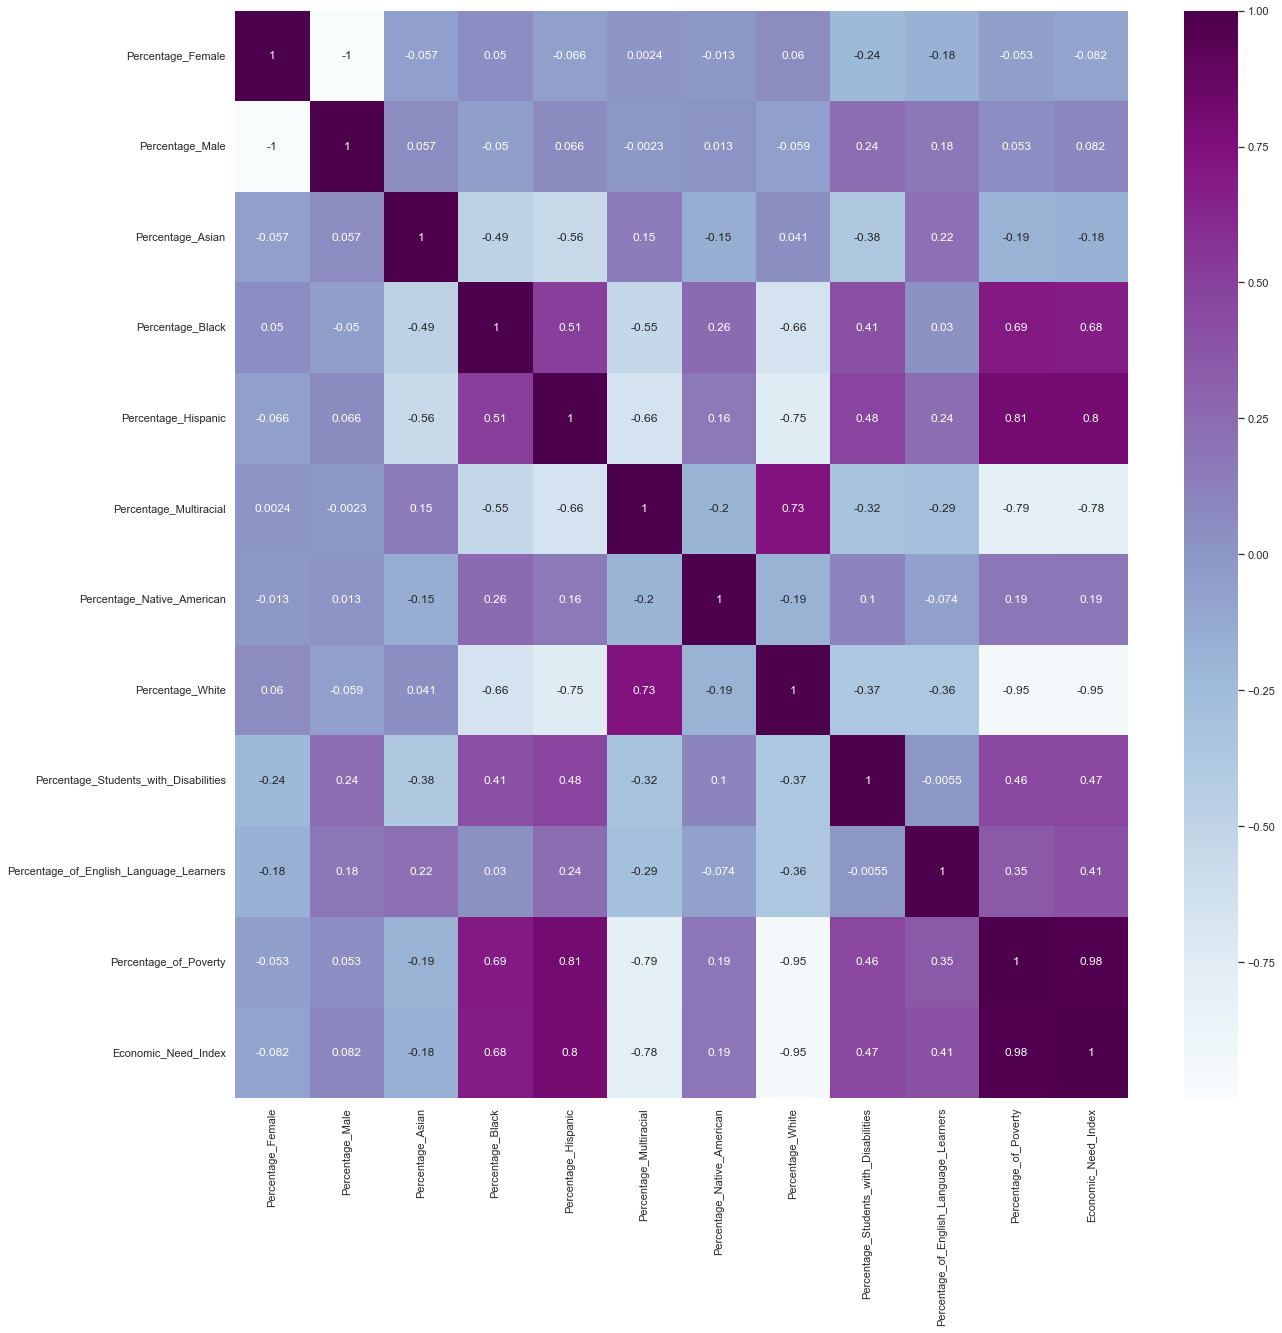

In [111]:
sns.heatmap(df.corr(), cmap="BuPu", annot = True)
plt.show()

### Checks for correlations between Economic Need Index and Percentage of Poverty 

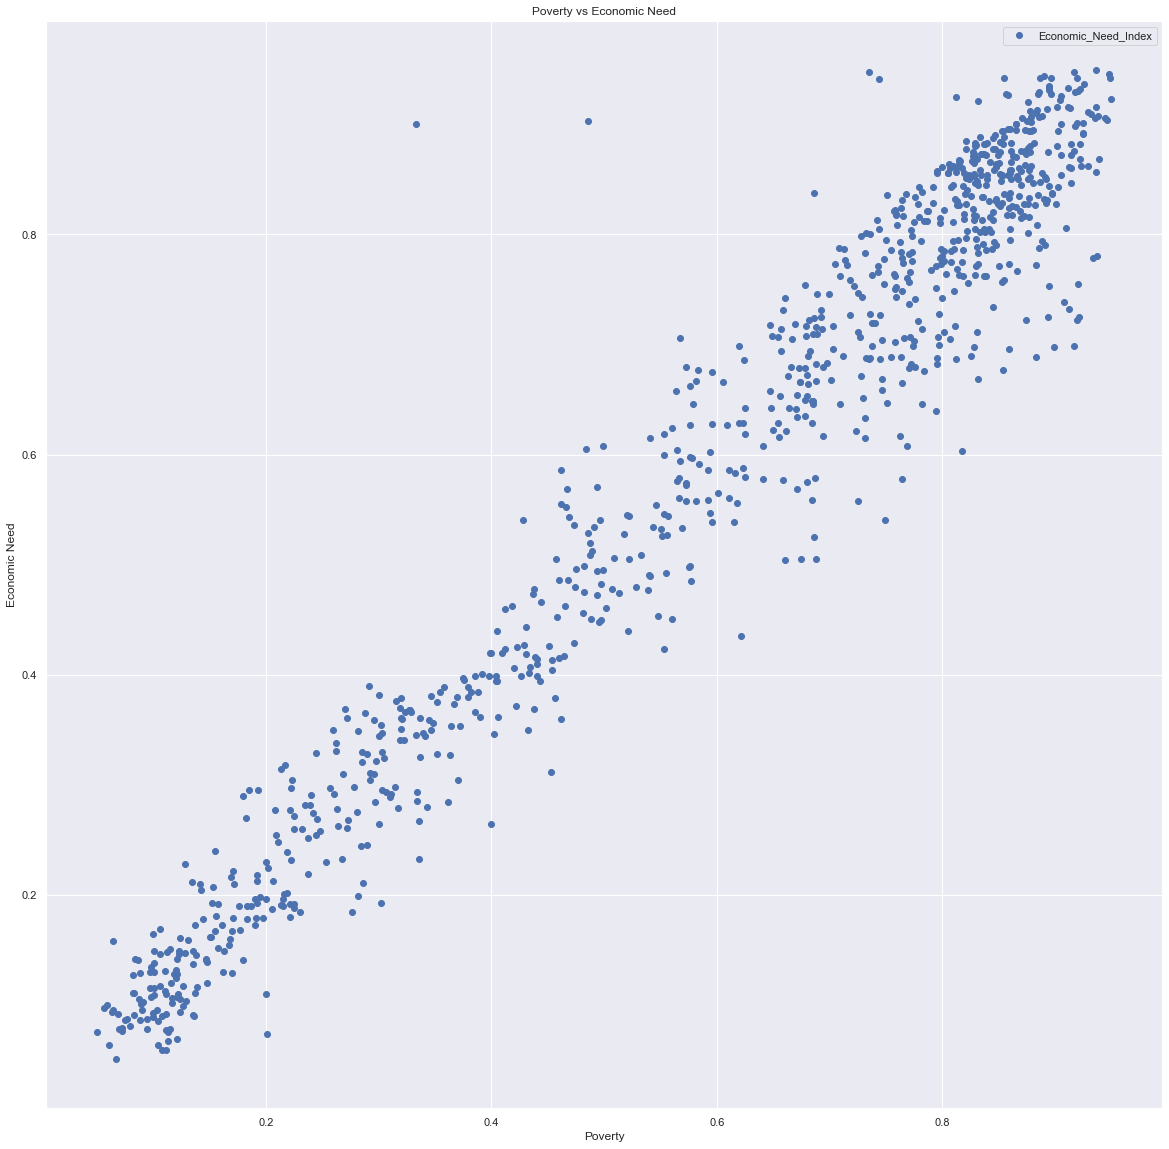

In [128]:
df.plot(x='Percentage_of_Poverty', y='Economic_Need_Index', style='o')
plt.title('Poverty vs Economic Need')
plt.xlabel('Poverty')
plt.ylabel('Economic Need')
plt.show()

### Checks for the Mean Square Error and create a linear regression based on results. 

In [129]:
SGDR = SGDRegressor(loss='squared_loss', penalty= 'l1', tol = 1e-3, alpha=0.0001, max_iter=10000)

In [130]:
X = np.reshape(df['Percentage_of_Poverty'].values,(-1,1))
y = np.reshape(df['Economic_Need_Index'].values, (-1))

In [131]:
SGDR.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


SGDRegressor(loss='squared_loss', max_iter=10000, penalty='l1')

In [132]:
SGDR.coef_

array([0.61988346])

In [133]:
SGDR.intercept_

array([0.23047553])

In [134]:
squared_list = [SGDR.intercept_[0] + SGDR.coef_[0] * i for i in X]

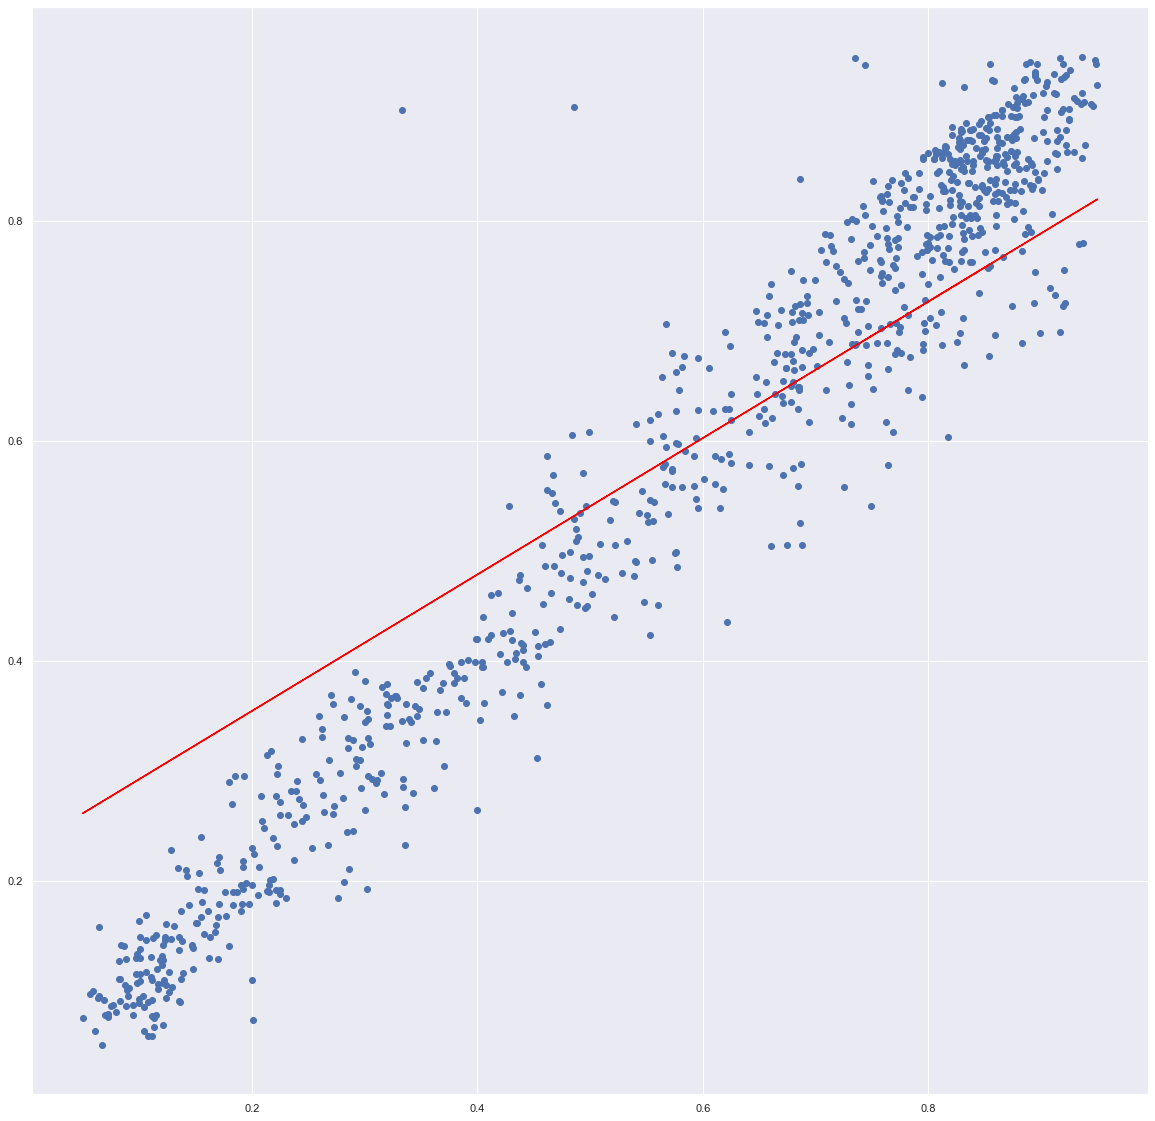

In [135]:
plt.plot(X, squared_list, color = 'red')
plt.scatter(X, y)

### Checks Correlation between Percentage of English Language Learners and Economic Need Index

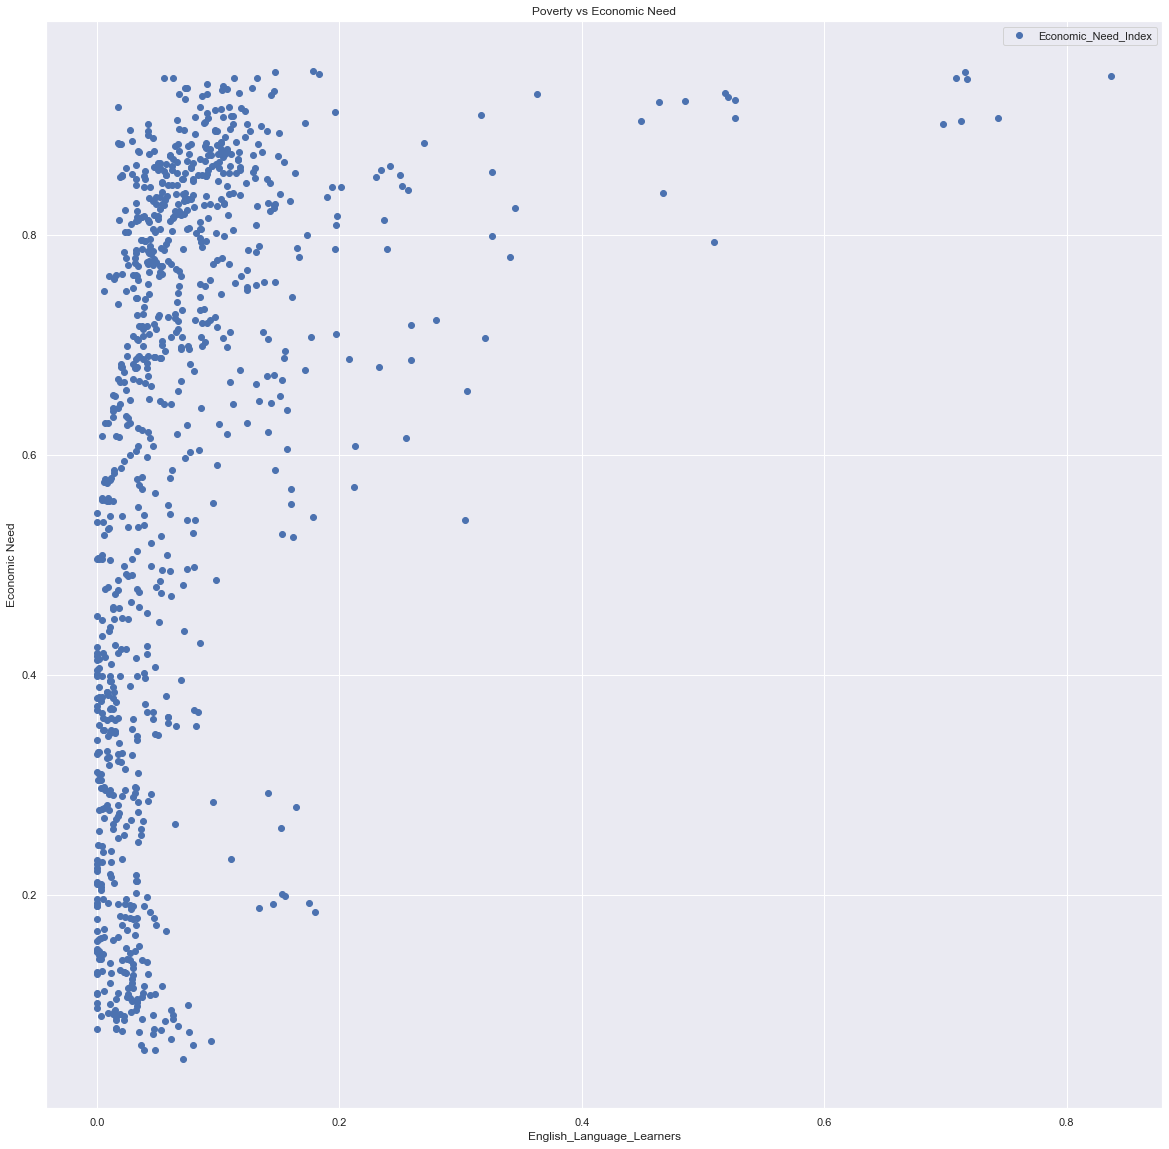

In [136]:
df.plot(x='Percentage_of_English_Language_Learners', y='Economic_Need_Index', style='o')
plt.title('Poverty vs Economic Need')
plt.xlabel('English_Language_Learners')
plt.ylabel('Economic Need')
plt.show()

### Checks for the Mean Square Error and create a linear regression based on results. 

In [137]:
SGDR = SGDRegressor(loss='squared_loss', penalty= 'l1', tol = 1e-3, alpha=0.001, max_iter=10000)

In [138]:
X_Language = np.reshape(df['Percentage_of_English_Language_Learners'].values,(-1,1))
y_Need = np.reshape(df['Economic_Need_Index'].values, (-1))

In [139]:
SGDR.fit(X_Language, y_Need)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


SGDRegressor(alpha=0.001, loss='squared_loss', max_iter=10000, penalty='l1')

In [140]:
SGDR.coef_

array([0.12297904])

In [141]:
SGDR.intercept_

array([0.57240603])

In [142]:
huber_list = [SGDR.intercept_[0] + SGDR.coef_[0] * i for i in X_Language]

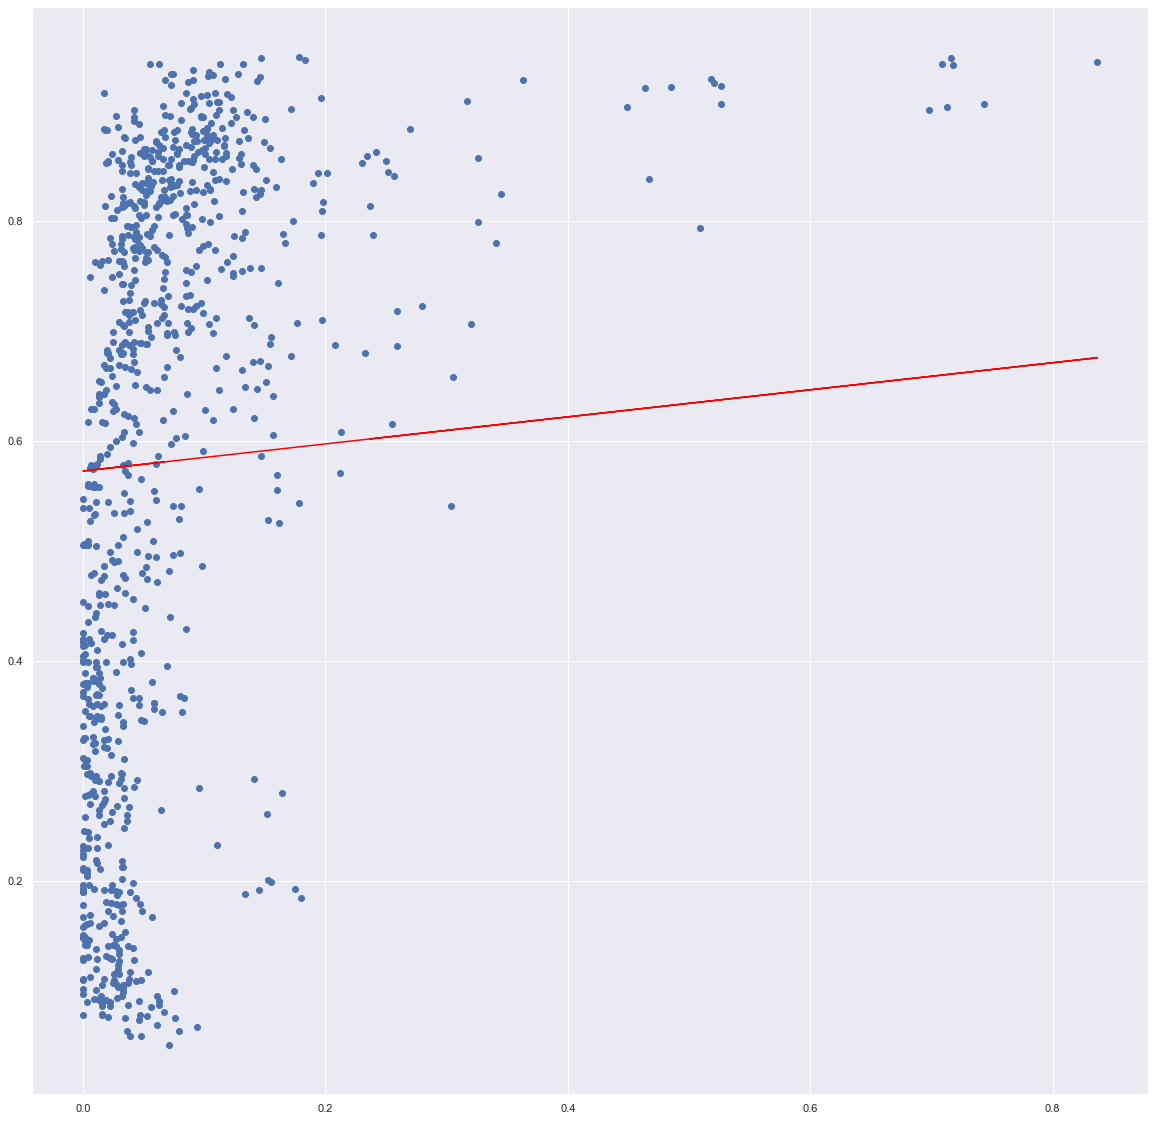

In [143]:
plt.plot(X_Language, huber_list, color = 'red')
plt.scatter(X_Language, y_Need)

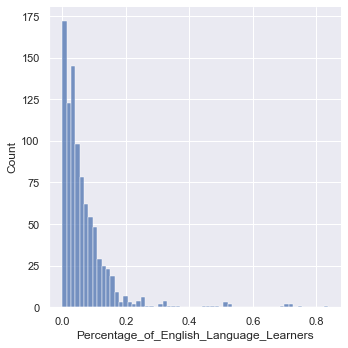

In [150]:
sns.displot(df, x = 'Percentage_of_English_Language_Learners')

### Based on the school year, what was the percentage of poverty 

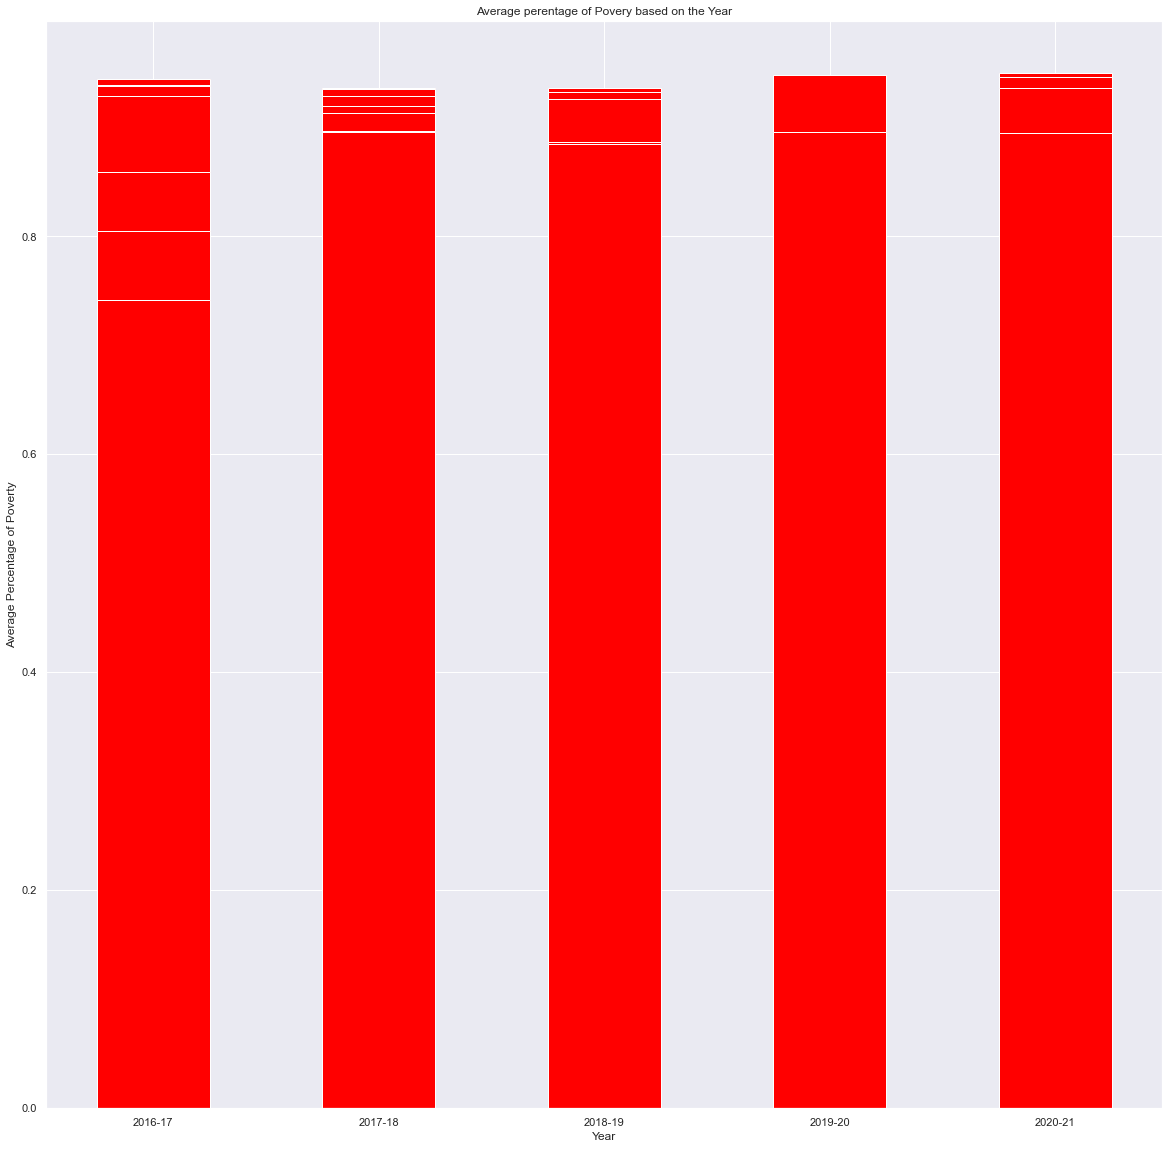

In [146]:
plt.bar(df['Year'], df['Percentage_of_Poverty'], color ='red', width = 0.5)
plt.xlabel("Year")
plt.ylabel("Average Percentage of Poverty")
plt.title("Average perentage of Povery based on the Year")
plt.show()